In [5]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import urllib
from pathlib import Path
import os
import urllib
#import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [6]:
file_path_cs_class =  'raw/train.csv' 

pd_cs_class = pd.read_csv(file_path_cs_class)

#pd_cs_class

C:\Users\shiya\AppData\Local\Temp\ipykernel_23380\3145283759.py:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  pd_cs_class = pd.read_csv(file_path_cs_class)


In [ ]:
pd_cs_class.describe()
pd_cs_class.head(10)

In [7]:
features = ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month' ]

scaler = MinMaxScaler()
pd_cs_class[features] = scaler.fit_transform(pd_cs_class[features])

In [8]:
df_X = pd_cs_class[features]
#df_X

In [9]:
df_y = pd_cs_class['Credit_Score']
cs_mapping = {
    'Good': 3,
    'Standard':2,
    'Poor':1
}
df_y = df_y.map(cs_mapping)
#df_y

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df_X,df_y,test_size=0.3,random_state=42)

In [11]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Set random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 2.10.0
TensorFlow version: 2.10.0


In [12]:
# Set data types for float features
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set data types for categorical labels
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Ready...')

Ready...


In [17]:
# Define a classifier network
hl = 10 # Number of hidden layer nodes

model = Sequential()
model.add(Dense(hl, input_dim=len(features), activation='relu'))
model.add(Dense(hl, input_dim=hl, activation='relu'))
model.add(Dense(4, input_dim=hl, activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                90        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 4)                 44        
                                                                 
Total params: 244
Trainable params: 244
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
#hyper-parameters for optimizer
learning_rate = 0.001
opt = optimizers.Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 50
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/50


c:\Users\shiya\miniconda3\envs\proj2_ml_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


7000/7000 [==============================] - 30s 4ms/step - loss: 1.0182 - accuracy: 0.5327 - val_loss: 1.0036 - val_accuracy: 0.5291
Epoch 2/50
7000/7000 [==============================] - 41s 6ms/step - loss: 1.0023 - accuracy: 0.5329 - val_loss: 1.0034 - val_accuracy: 0.5291
Epoch 3/50
7000/7000 [==============================] - 39s 6ms/step - loss: 1.0020 - accuracy: 0.5329 - val_loss: 1.0036 - val_accuracy: 0.5291
Epoch 4/50
7000/7000 [==============================] - 42s 6ms/step - loss: 1.0022 - accuracy: 0.5329 - val_loss: 1.0040 - val_accuracy: 0.5291
Epoch 5/50
7000/7000 [==============================] - 40s 6ms/step - loss: 1.0022 - accuracy: 0.5329 - val_loss: 1.0035 - val_accuracy: 0.5291
Epoch 6/50
7000/7000 [==============================] - 39s 6ms/step - loss: 1.0021 - accuracy: 0.5329 - val_loss: 1.0036 - val_accuracy: 0.5291
Epoch 7/50
7000/7000 [==============================] - 39s 6ms/step - loss: 1.0022 - accuracy: 0.5329 - val_loss: 1.0037 - val_accuracy: 0.5

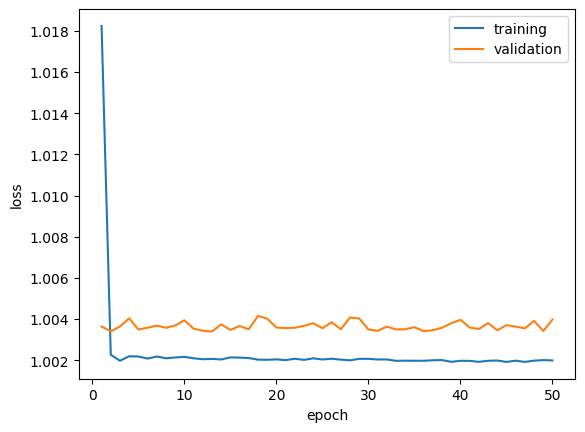

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [20]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('------------\nWeights:\n',weights,'\nBiases:\n', biases)

------------
Weights:
 [[        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan]
 [ 0.13491541 -0.16775934 -0.10562814 -0.38003948  0.17421992  0.09719782
   0.48436728 -0.07605386 -0.12074497 -0.4283532 ]
 [ 0.16834901 -0.07656169 -0.34920636  0.41365626  0.51698035  0.35604563
   0.00367672 -0.25273636 -0.29777557  0.39334908]
 [ 0.12479511 -0.4246093  -0.04445906 -0.23714386 -0.09752101  0.18588361
   0.4160193   0.51524234  0.40348318 -0.02811357]
 [-0.09145641 -0.13656478  0.2844822   0.38387474 -0.06983985  0.4581444
   0.08023389  0.02824336  0.41038617  0.00633137]
 [        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan]
 [ 0.4602307  -0.13979317  0.14658889 -0.04108911  0.45777345 -0.38974065
   0.01109476 -0.37394732  0.4390268   0.55915153]
 [-0.53764    -0.05305082  0.4808959   0.46285188  0.26594043  0.22494808
   0.39401174  0.16398823  0.

938/938 [==============================] - 2s 2ms/step


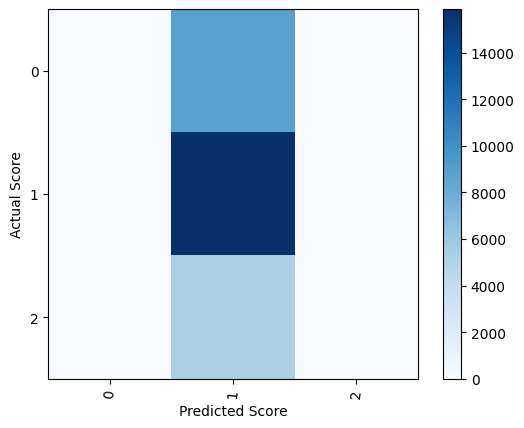

In [23]:

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks,  rotation=85)
plt.yticks(tick_marks, )
plt.xlabel("Predicted Score")
plt.ylabel("Actual Score")
plt.show()